 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
print(f"{Path.cwd()}")
whale_filepath=("./Resources/whale_returns.csv")
#Reading csv file into dataframe
whale = pd.read_csv(whale_filepath, index_col='Date', parse_dates=True, infer_datetime_format=True)

whale.head()

C:\Users\Sylvia\Documents\MySchool\FinTech_Bootcamp\github_excerise\Pandas_homework


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_filepath=("./Resources/algo_returns.csv")
#Reading csv file into dataframe
algo=pd.read_csv(algo_filepath, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo.dropna(inplace=True)
algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp5500_filepath=("./Resources/sp500_history.csv")
sp500=pd.read_csv(sp5500_filepath, index_col='Date', parse_dates=True, infer_datetime_format=True)
# data cleaning; remove $ sign
clean_close=[]
for x in sp500["Close"][:]:
    x=str.replace(x,"$","")
    clean_close.append(x)
sp500["Close"] =clean_close
 

In [9]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
#Convert str to float
sp500["Close"]= sp500["Close"].astype('float')

In [11]:
# Calculate Daily Returns
#Cacluate daily return method1:
#sp500_dailyreturn = (sp500["Close"]-sp500["Close"].shift(1))/sp500["Close"].shift(1)
#sp500_dailyreturn

#Cacluate daily return method2:
sp500_dailyreturn = sp500.pct_change()
sp500_dailyreturn.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_dailyreturn.dropna(inplace=True)
sp500_dailyreturn

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_dailyreturn = sp500_dailyreturn.rename(columns = {"Date":"Date","Close":"SP500_Daily_Return"} )
sp500_dailyreturn.head(20)

,SP500_Daily_Return
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
2019-04-12,0.000630
2019-04-11,-0.006566
2019-04-10,-0.000038
2019-04-09,-0.003466


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

# Concat returns into one DataFrame
all_portfolios_returns = pd.concat([whale, algo,sp500_dailyreturn], axis='columns', join='inner')
all_portfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:>

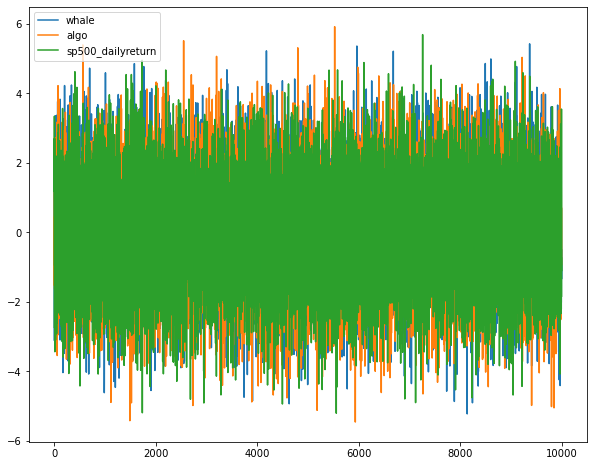

In [15]:
# Plot daily returns of all portfolios

whale_plot= np.random.normal(scale=1.5, size=10000)
algo_plot = np.random.normal(scale=1.5, size=10000)
sp500_dailyreturn_plot = np.random.normal(scale=1.5, size=10000)

all_portfolio = pd.DataFrame({
    "whale": whale_plot,
    "algo": algo_plot,
    "sp500_dailyreturn": sp500_dailyreturn_plot
})

all_portfolio.plot(figsize=(10,8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

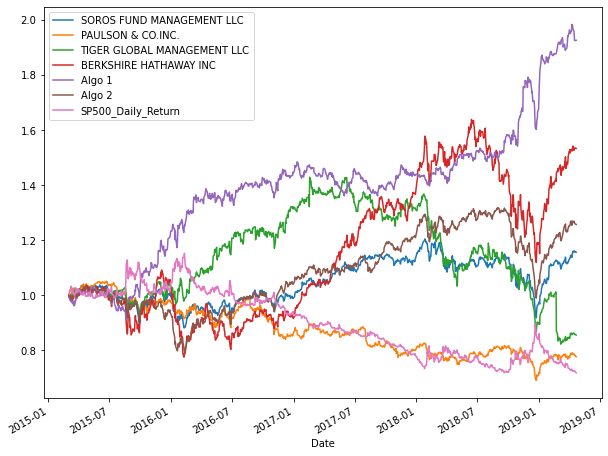

In [16]:
# Calculate cumulative returns of all portfolios
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + all_portfolios_returns).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(10,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

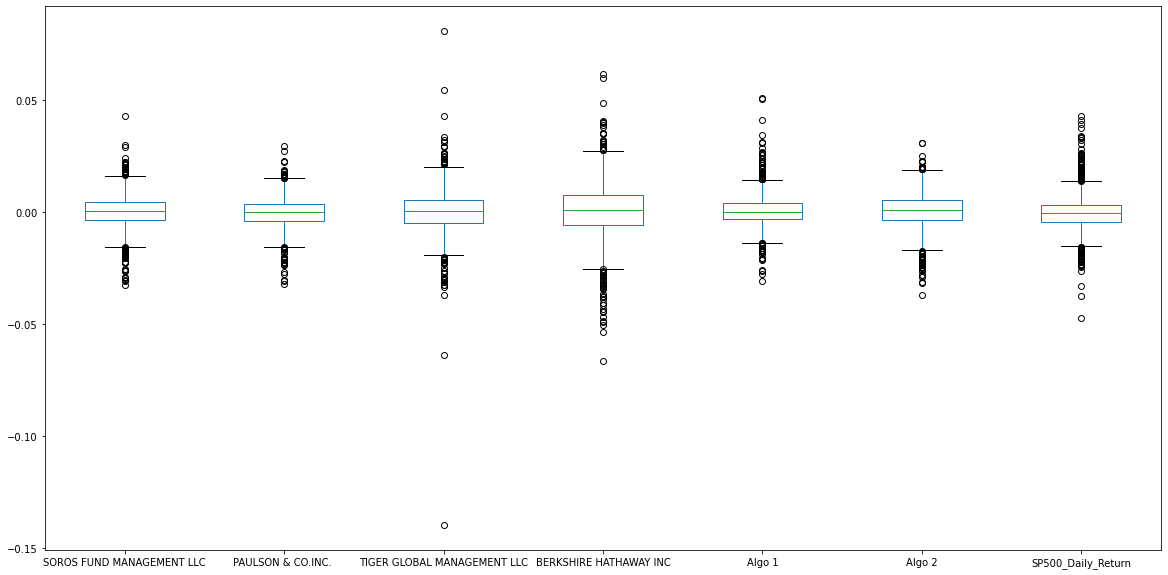

In [17]:
# Box plot to visually show risk
all_portfolios_returns.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
all_portfolios_returns.dropna(inplace=True)
all_portfolio_std = all_portfolios_returns.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500_Daily_Return             0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
SP500_Daily_Return_std = sp500_dailyreturn.std()
SP500_Daily_Return_std
# Determine which portfolios are riskier than the S&P 500
# Identify the stock with the most risk
all_portfolio_std = all_portfolio_std.sort_values(ascending=False)
all_portfolio_std[:2]

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
all_portfolio_annual_std = all_portfolio_std * np.sqrt(252)
all_portfolio_annual_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP500_Daily_Return             0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

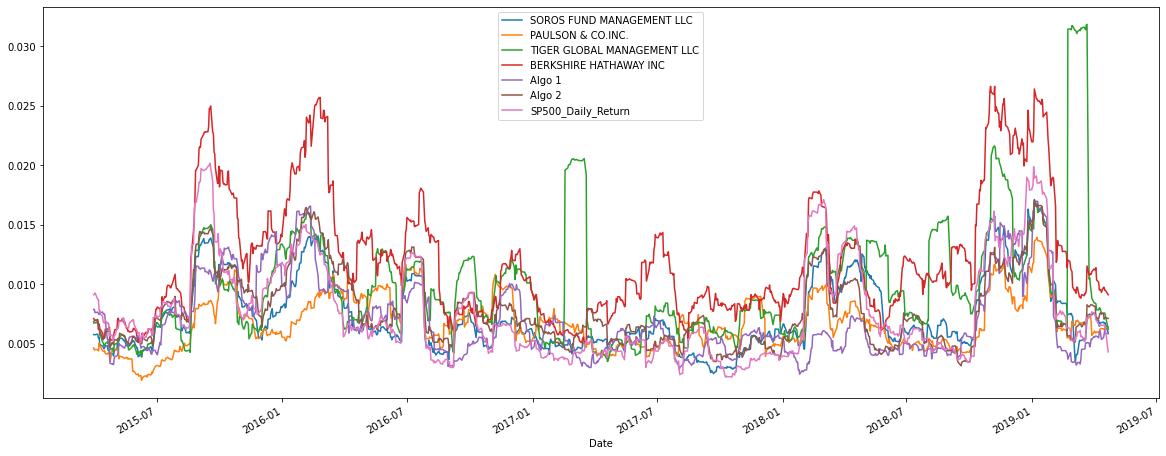

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = all_portfolios_returns.rolling(window=21).std()
rolling_21
# Plot the rolling standard deviation
rolling_21.plot(figsize=(20,8))

### Calculate and plot the correlation

<AxesSubplot:>

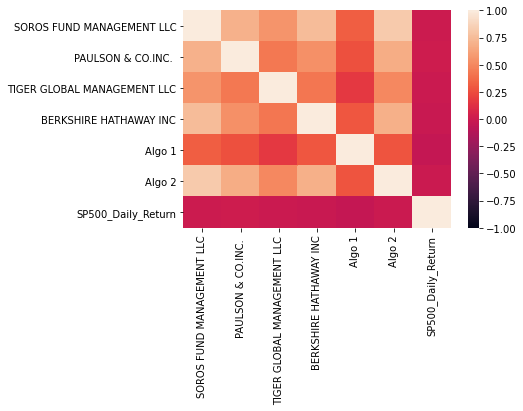

In [22]:
# Calculate the correlation
correlation=all_portfolios_returns.corr()
correlation
# Display de correlation matrix
#use heatmap to display correlation
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

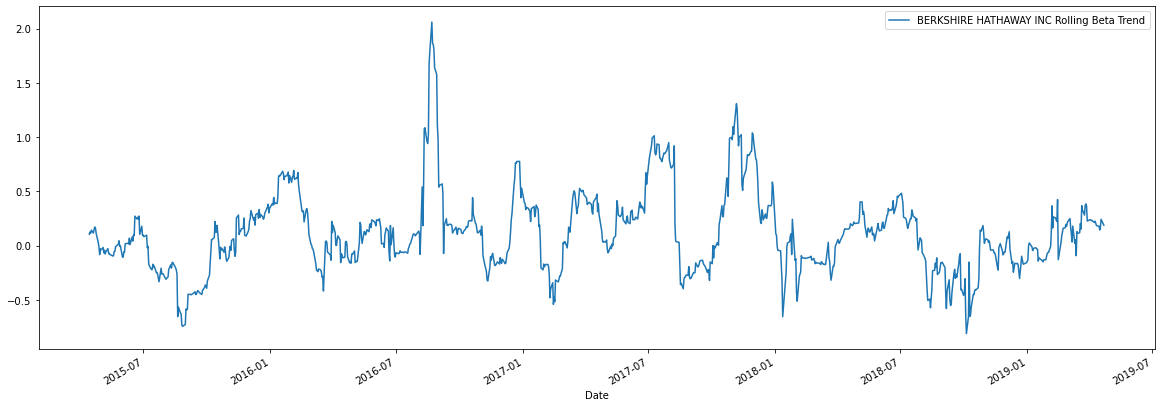

In [23]:
# Calculate covariance of a single portfolio
BK_cov= all_portfolios_returns['BERKSHIRE HATHAWAY INC'].cov(all_portfolios_returns['SP500_Daily_Return'])
BK_cov

# Calculate variance of S&P 500
SP_var = all_portfolios_returns['SP500_Daily_Return'].var()
SP_var
# Computing beta
BK_beta= BK_cov/SP_var
BK_beta

# Plot beta trend
#rolling beta trend
rolling_BK_cov = all_portfolios_returns['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(all_portfolios_returns['SP500_Daily_Return'])
rolling_SP_var= all_portfolios_returns['SP500_Daily_Return'].rolling(window=30).var()
rolling_BK_beta = rolling_BK_cov/rolling_SP_var
rolling_BK_beta.plot(figsize=(20,7)).legend(["BERKSHIRE HATHAWAY INC Rolling Beta Trend"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

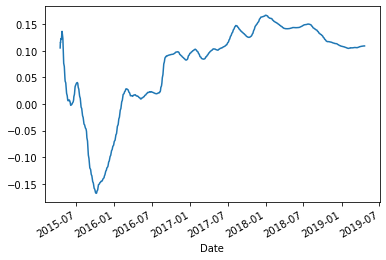

In [24]:
# Use `ewm` to calculate the rolling window
BK_ewm = rolling_BK_beta.ewm(halflife='21 days', times = pd.DatetimeIndex(rolling_BK_beta)).mean()
BK_ewm.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios

sharpe_ratios = ((all_portfolios_returns.mean()) * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500_Daily_Return            -0.518582
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharp Ratio'}>

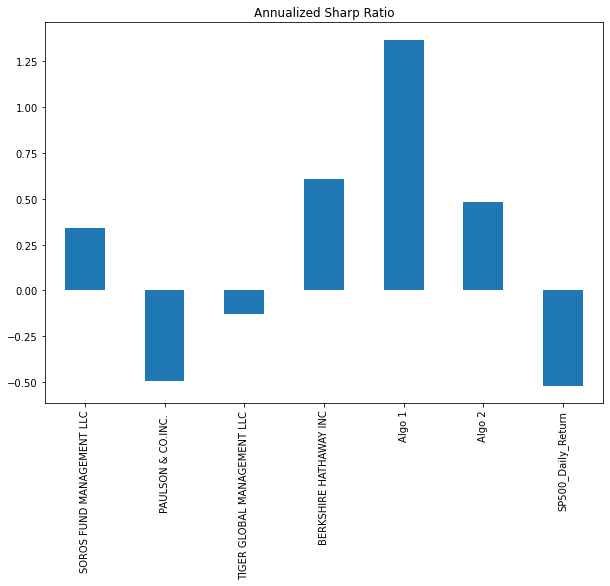

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title ='Annualized Sharp Ratio', figsize=(10,7))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algorithmic strategy Algo 1 has the highest sharp ratio, which indicates has the best return, and outperformed both S&P 500 and whales portfolios.
Algorithmic strategy Algo 2 has the third highest sharp ratio, slighlty less than Whale portofolio's 'BERKSHIRE HATHAWAY INC'. However 'BERKSHIRE HATHAWAY INC' has the highest standard deviation, risker than S&P500, in which case indicates that overall, Algo is better than 'BERKSHIRE HATHAWAY INC' and S&P500.
Overall, yes the algorithmic strategies Algo1 and 2 outperform both the market and the whales portofolios.


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [27]:
# Reading data from 1st stock
print(f"current directory:{Path.cwd()}")
google_path=Path("./Resources/goog_historical.csv")
google_df = pd.read_csv(google_path,index_col="Trade DATE", parse_dates=True, infer_datetime_format = True)
google_df


current directory:C:\Users\Sylvia\Documents\MySchool\FinTech_Bootcamp\github_excerise\Pandas_homework


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [28]:
# Reading data from 2nd stock
apple_path=Path("./Resources/aapl_historical.csv")
apple_df = pd.read_csv(apple_path,index_col="Trade DATE", parse_dates=True, infer_datetime_format = True)
apple_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [29]:
# Reading data from 3rd stock
cost_path=Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_path,index_col="Trade DATE", parse_dates=True, infer_datetime_format = True)
cost_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [30]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([google_df,apple_df,cost_df],axis="columns",join="inner")


In [31]:
# Reset Date index
combined_df.sort_index(inplace=True)
combined_df

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18


In [32]:
# Reorganize portfolio data by having a column per symbol
# Rename 'NOCP' column name with ticker
combined_df.columns =['GOOG_symbol','GOOG','AAPL_symbol','AAPL','COST_symbol','COST']
combined_df.drop(columns=['GOOG_symbol','AAPL_symbol','COST_symbol'],inplace=True)
combined_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [33]:
# Calculate daily returns
daily_return=combined_df.pct_change()
# Drop NAs
daily_return.dropna(inplace=True)
# Display sample data
daily_return.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_return = daily_return.dot(weights)

# Display sample data
weighted_return.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
All_portfolio = pd.concat([all_portfolios_returns,daily_return],axis="columns", join="inner")
All_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Return,GOOG,AAPL,COST
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.001766,-0.002333,0.000613
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.019060,-0.009088,-0.002042
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.002354,0.009333,0.016523
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.002940,-0.006324,0.004479
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.011339,-0.003637,-0.003206


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
All_portfolio.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
All_portfolio_std = All_portfolio.std() * np.sqrt(252)
All_portfolio_std 

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
SP500_Daily_Return             0.152469
GOOG                           0.255747
AAPL                           0.297235
COST                           0.212330
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

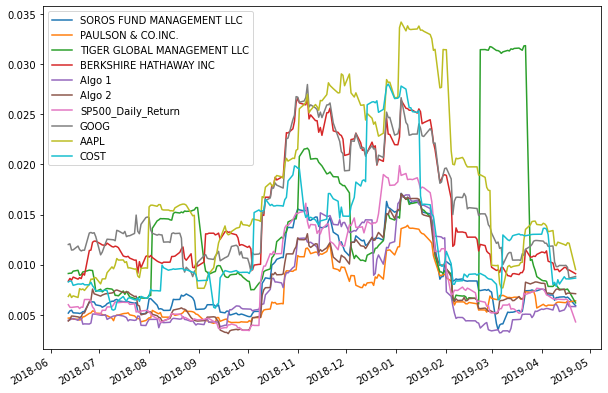

In [38]:
# Calculate rolling standard deviation
All_portfolio_rolling = All_portfolio.rolling(window=21).std()

# Plot rolling standard deviation
All_portfolio_rolling.plot(figsize=(10,7))

### Calculate and plot the correlation

<AxesSubplot:>

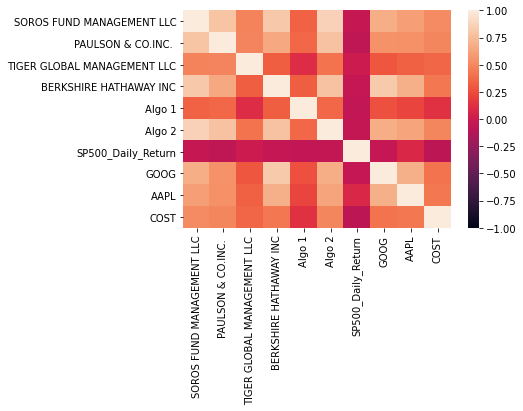

In [39]:
# Calculate and plot the correlation
All_portfolio_corr=All_portfolio.corr()
sns.heatmap(All_portfolio_corr,vmin=-1,vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

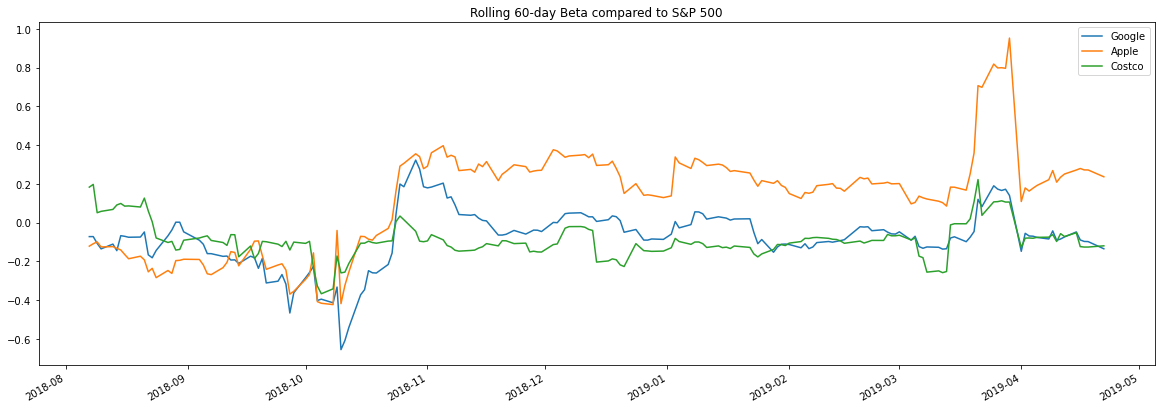

In [40]:
# Calculate and plot Beta
    # Calculate covariance of a single portfolio
GOOG_rolling_cov= All_portfolio['GOOG'].rolling(window=60).cov(All_portfolio['SP500_Daily_Return'])
AAPL_rolling_cov=All_portfolio['AAPL'].rolling(window=60).cov(All_portfolio['SP500_Daily_Return'])
COST_rolling_cov=All_portfolio['COST'].rolling(window=60).cov(All_portfolio['SP500_Daily_Return'])

# Calculate variance of S&P 500
SP_rolling_var = All_portfolio['SP500_Daily_Return'].rolling(window=60).var()
SP_rolling_var
#Computing rolling beta trend
GOOG_rolling_beta = GOOG_rolling_cov/SP_rolling_var 
AAPL_rolling_beta = AAPL_rolling_cov/SP_rolling_var 
COST_rolling_beta = COST_rolling_cov/SP_rolling_var 

#Plot three lines in one diagram
ax=GOOG_rolling_beta.plot(figsize=(20,7),title="Rolling 60-day Beta compared to S&P 500")
#add the other two lines into the same diagram 'ax'
AAPL_rolling_beta.plot(ax=ax)
COST_rolling_beta.plot(ax=ax)
ax.legend(["Google", "Apple","Costco"])


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualzied Sharpe Ratios
# Annualized Sharpe Ratios
All_cus_sharpe_ratios = ((All_portfolio.mean()) * 252) / (All_portfolio.std() * np.sqrt(252))
All_cus_sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
SP500_Daily_Return            -0.427676
GOOG                           0.663844
AAPL                           0.440644
COST                           1.203329
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratio'}>

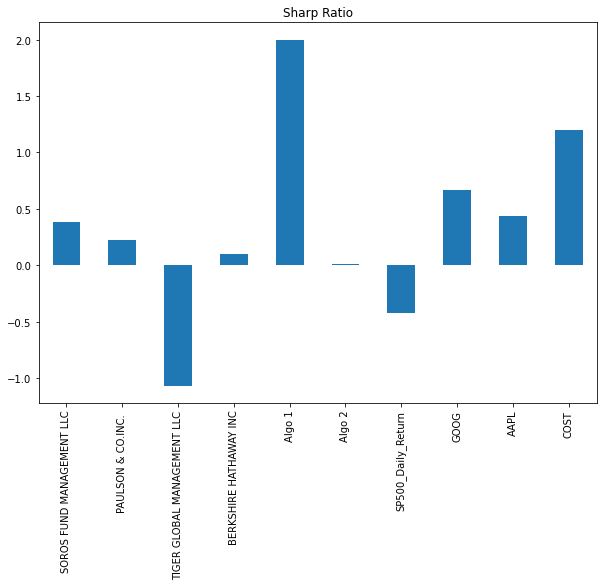

In [42]:
# Visualize the sharpe ratios as a bar plot
All_cus_sharpe_ratios.plot(kind='bar', figsize=(10,7), title='Sharp Ratio')

### How does your portfolio do?

Write your answer here!

Google, Apple, Costco outperformed S&P500, but they are underperformed comparing to Algo1